# Coursework D

SN: 21019919

In this notebook, we look into dimensionality reduction and its impact on neural network performance, using the MNIST dataset as we have done over the previous weeks. The MNIST dataset is our experimental data we use to investigate the usefullness of Principal Component Analysis (PCA) in enhancing neural network efficiency and accuracy. This notebook involves training a neural network to achieve good accuracy, applying PCA for dimensionality reduction, and evaluating the reduced network's performance, all without retraining the network. Through multiple iterations, we show the optimal balance between dimensionality reduction and model performance.

## Importing relevant modules

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import math
from tensorflow.keras import datasets, layers, models

import matplotlib.style 
import matplotlib as mpl

from sklearn.metrics import accuracy_score

## Neural network training on MINST 

In [2]:
#loading MNIST 
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#rescale pixel values to be between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0


# Defining the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training
model.fit(train_images, train_labels, epochs=10   , 
                    validation_data=(test_images, test_labels))

# Evaluating
model.summary()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.2553 - accuracy: 0.9270 - val_loss: 0.1355 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.1133 - accuracy: 0.9662 - val_loss: 0.0965 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.0778 - accuracy: 0.9762 - val_loss: 0.0786 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0843 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 1s 699us/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0838 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0857 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0765 -

## Decomposition into PCA components

train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)
x.shape: (60000, 784)
P.shape: (60000, 784)


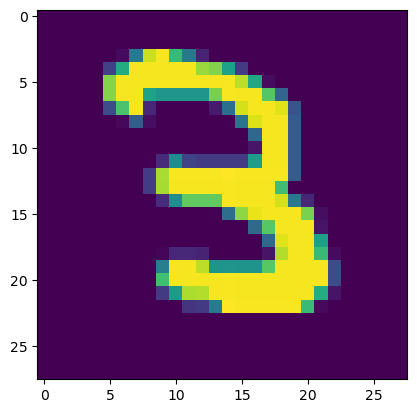

In [3]:
print("train_images.shape: ",np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))
#finding mean
mu=np.mean(X,axis=0)
x=X-mu

# creating covaraince matrix using np.cov
rho=np.cov(x,rowvar=False)
print("rho.shape:",np.shape(rho))


# Eigen values and vectors decomposition
eigenvals,eigenvecs=np.linalg.eigh(rho)
print("vecs.shape:",np.shape(eigenvecs))
print("vals.shape:",np.shape(eigenvals))
eigenvecs=np.flip(eigenvecs)
eigenvals=np.flip(eigenvals)


P=np.dot(x,eigenvecs)
print("x.shape:",x.shape)
print("P.shape:",P.shape)
newImage2=(np.dot(P[:,0:2],eigenvecs.T[0:2,:]))+mu
newImage10=(np.dot(P[:,0:10],eigenvecs.T[0:10,:]))+mu
newImage50=(np.dot(P[:,0:50],eigenvecs.T[0:50,:]))+mu
newImage100=(np.dot(P[:,0:100],eigenvecs.T[0:100,:]))+mu
newImage200=(np.dot(P[:,0:200],eigenvecs.T[0:200,:]))+mu
newImage500=(np.dot(P[:,0:500],eigenvecs.T[0:500,:]))+mu
newImage784=(np.dot(P[:,:],eigenvecs.T[:,:]))+mu

whichImage = 7
new1 = np.flipud(np.reshape(X[whichImage,:],[28,28]))

# show image
plt.imshow(new1)
plt.show()






## Testing Accuracy vs. Number of PCA Components

313/313 [==============================] - 0s 864us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


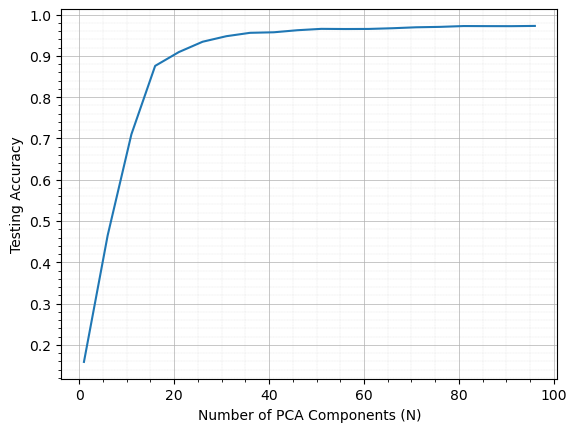

In [4]:
# Reconstructing original data from first 100 components
reconstructed_data = (np.dot(P[:,0:100], eigenvecs.T[0:100,:])) + mu

# Reshape reconstructed data into 28x28 pics
reconstructed_images = reconstructed_data.reshape(-1, 28, 28)


X_test = np.reshape(test_images, (10000, 784)) - mu
P_test = np.dot(X_test, eigenvecs)

# List to store accuracies
accuracies = []

# Range of N values for to test
N_values = range(1, 100, 5)

for N in N_values:
    # Reconstruct test images using N-best PCA components
    newImageN = (np.dot(P_test[:,0:N], eigenvecs.T[0:N,:])) + mu

    # Reshape and flatten images
    newImageN_flat = newImageN.reshape(newImageN.shape[0], -1)
    
    # Reshape flattened images to match the model's input
    newImageN_reshaped = newImageN_flat.reshape(-1, 28, 28)

# Predictions
    predictions = model.predict(newImageN_reshaped)


    # Calculating the accuracy
    accuracy = accuracy_score(test_labels, np.argmax(predictions, axis=1))
    accuracies.append(accuracy)
model.summary()

# Plot N vs testing accuracy with my own special graph settings
plt.plot(N_values, accuracies)
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()

## Retraining Neural Network with 100-Best PCA Components

In [5]:
# Use 100-best PCA values to make new dataset
P_train = np.dot(x, eigenvecs)
newTrainImage100 = (np.dot(P_train[:,0:100], eigenvecs.T[0:100,:])) + mu

# Reshape the data
newTrainImage100_reshaped = newTrainImage100.reshape(-1, 28, 28)

# Defining new model
model_100 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# new model compiling
model_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train new model with new training data
model_100.fit(newTrainImage100_reshaped, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

# Evaluate retrained model
test_loss, test_acc = model_100.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 2s 795us/step - loss: 0.2614 - accuracy: 0.9261 - val_loss: 0.1366 - val_accuracy: 0.9599
Epoch 2/5
1875/1875 [==============================] - 1s 786us/step - loss: 0.1159 - accuracy: 0.9660 - val_loss: 0.0992 - val_accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.0835 - accuracy: 0.9753 - val_loss: 0.0880 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.0675 - accuracy: 0.9793 - val_loss: 0.0870 - val_accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0774 - val_accuracy: 0.9769
313/313 - 0s - loss: 0.0774 - accuracy: 0.9769 - 139ms/epoch - 445us/step

Test accuracy: 0.9768999814987183


## Accuracy Evaluation with the Refined Network

313/313 [==============================] - 0s 815us/step


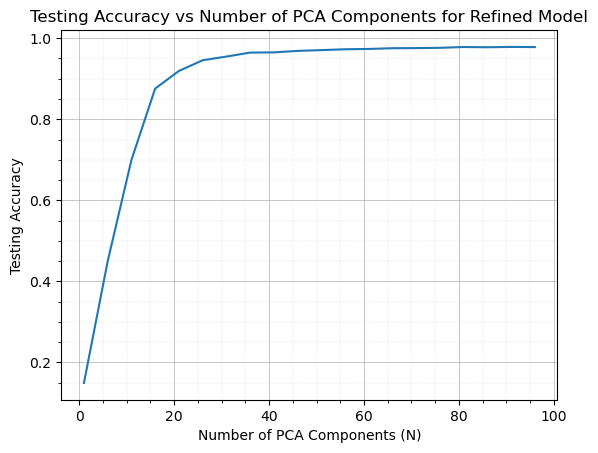

In [6]:
# Storing testing accuracies
accuracies_retrained = []

# N value range to test
N_values = range(1, 101, 5)

for N in N_values:
    # Reconstruc test images using N-best PCA vals
    newImageN_test = (np.dot(P_test[:,0:N], eigenvecs.T[0:N,:])) + mu

    # Reshape the reconstructed images to match the model's input shape
    newImageN_test_reshaped = newImageN_test.reshape(-1, 28, 28)

    # Predict on reconstructed test images
    predictions = model_100.predict(newImageN_test_reshaped)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, np.argmax(predictions, axis=1))
    accuracies_retrained.append(accuracy)

# Plot N vs testing accuracy
plt.plot(N_values, accuracies_retrained)
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs Number of PCA Components for Refined Model')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()

Epoch 1/5
1875/1875 [==============================] - 1s 713us/step - loss: 0.3420 - accuracy: 0.8993 - val_loss: 0.2451 - val_accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 1s 682us/step - loss: 0.1780 - accuracy: 0.9462 - val_loss: 0.1937 - val_accuracy: 0.9415
Epoch 3/5
1875/1875 [==============================] - 1s 685us/step - loss: 0.1438 - accuracy: 0.9559 - val_loss: 0.1950 - val_accuracy: 0.9371
Epoch 4/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.1265 - accuracy: 0.9608 - val_loss: 0.1591 - val_accuracy: 0.9514
Epoch 5/5
1875/1875 [==============================] - 1s 697us/step - loss: 0.1170 - accuracy: 0.9637 - val_loss: 0.1828 - val_accuracy: 0.9444
313/313 - 0s - loss: 0.1828 - accuracy: 0.9444 - 115ms/epoch - 366us/step

Test accuracy: 0.9444000124931335
313/313 [==============================] - 0s 907us/step


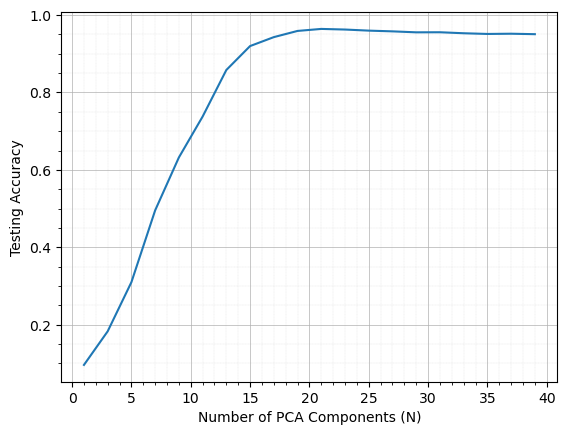

In [7]:
# Use 20-best PCA components to make a new training dataset
newTrainImage20 = (np.dot(P_train[:,0:20], eigenvecs.T[0:20,:])) + mu

# Reshape the reconstructed data into 28x28
newTrainImage20_reshaped = newTrainImage20.reshape(-1, 28, 28)

# New model
model_20 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

# Compile 
model_20.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train new model with new training dataset
model_20.fit(newTrainImage20_reshaped, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))

# Evaluate retrained model
test_loss, test_acc = model_20.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Use 20-best PCA components to make a new dataset
newTestImage20 = (np.dot(P_test[:,0:20], eigenvecs.T[0:20,:])) + mu

# Reshape and flatten reconstructed images
newTestImage20_flat = newTestImage20.reshape(newTestImage20.shape[0], -1)
    
# Reshape flat images to match the model input
newTestImage20_reshaped = newTestImage20_flat.reshape(-1, 28, 28)

# List for storing test accuracies
accuracies_20 = []

# Range of N values for the test
N_values = range(1, 40, 2)

for N in N_values:
    # Reconstruct test images using N-best PCA vals
    newImageN = (np.dot(P_test[:,0:N], eigenvecs.T[0:N,:])) + mu

    # Reshape and flatten reconstructed images
    newImageN_flat = newImageN.reshape(newImageN.shape[0], -1)
    
    # Reshape flat images to match model input
    newImageN_reshaped = newImageN_flat.reshape(-1, 28, 28)

    # Prediction on reconstructed images
    predictions = model_20.predict(newImageN_reshaped)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, np.argmax(predictions, axis=1))
    accuracies_20.append(accuracy)

# Plot N vs testing accuracy
plt.plot(N_values, accuracies_20)
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()

## Plotting all the models on same graph

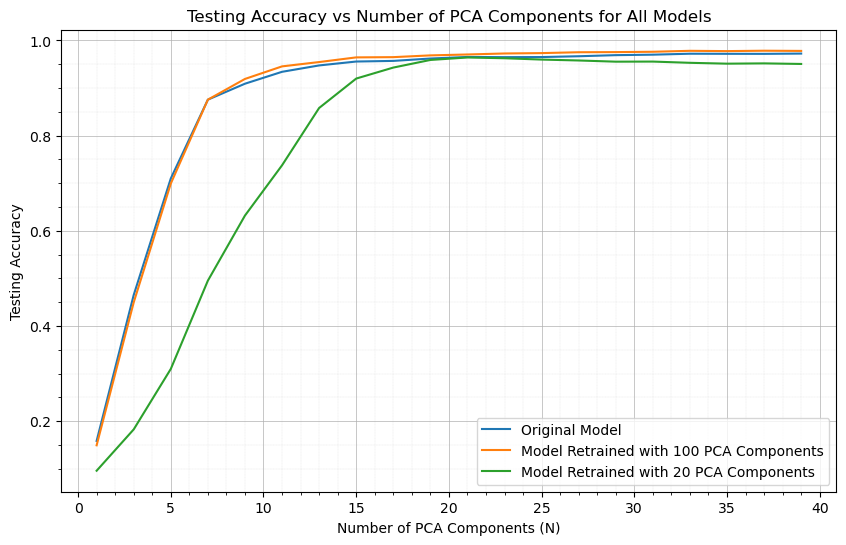

In [8]:
# Plot N vs testing accuracy for all models
plt.figure(figsize=(10, 6))
plt.plot(N_values, accuracies, label='Original Model')
plt.plot(N_values, accuracies_retrained, label='Model Retrained with 100 PCA Components')
plt.plot(range(1, 40, 2), accuracies_20, label='Model Retrained with 20 PCA Components')
plt.xlabel('Number of PCA Components (N)')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs Number of PCA Components for All Models')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()


## Conclusions

This notebook looks at the impact of Principal Component Analysis (PCA) on neural network performance with the MNIST dataset. Initially, a neural network trained on the full dataset exceeded the 95% accuracy target, getting a baseline for comparison. Then analysis involved evaluating the network's performance with reduced dimensions, without retraining, and after retraining with datasets reconstructed from the 100-best and 20-best PCA components.

We revealed that while reducing dimensions with PCA, a balance between dimensionality reduction and accuracy is achievable. Models retrained with reduced PCA components showed that good selection of components, it is possible to maintain high accuracy, indicating PCA's ability in enhancing computational efficiency and model performance.

A comparative analysis of models across different PCA component counts shows the effectiveness of PCA in optimising neural network training and deployment, showing the importance of selecting an appropriate number of components for  data compression whilst mainting the accuracy.

In summary, this work shows PCA's potential in improving neural network efficiency, through dimension reduction and model optimisation.